<a href="https://colab.research.google.com/github/Ranjan00001/calculus-2/blob/main/Ellipse%20arc%20length.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import math
from scipy.integrate import quad
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# finding arc length using Integration

$$L(f(x)) = ∫_{x_1}^{x_2}|\frac{dr⃗}{dt}|dt$$

But for ellipse integrand is much complex so we are doing there numerical integration. And then we'll have to guess the function using Linear Regression. 

In [2]:
def f(t, a, b):
  return (a**2*(math.cos(t))**2 + b**2*(math.sin(t))**2)**0.5

def g(t):
  return f(t, a, b)

blist = [i/10 for _ in range(10) for i in range(20,40)]
alist = []
for i in range(20, 30):
  for _ in range(20):
    alist.append(i/10)
result = []
circle = []
verify = []

for i in range(200):
  a = alist[i]
  b = blist[i]
  c = quad(g, 0, math.pi)
  if a == b:
    circle.append((2*c[0], a))
    verify.append((2*math.pi*a, a))
  result.append(2*c[0])
 
# print(result)
# print(circle)
# print(verify)

# finding arc length using Srinivasa Ramanujan equation

arc length of Ellipse:
$$ Π\left[3(a+b)-\sqrt{(3a+b)(3b+a)}\right]$$
that's somewhat approximation

the more accurate equation is:
$$Π(a+b)(1+\dfrac{3h}{10+\sqrt{4-3h}})$$

here we'll find arc length using 2nd equation that's more accurate

In [6]:
arclength = []
for i in range(200):
  a = alist[i]
  b = blist[i]
  h = ((a-b)/(a+b))**2
  res = math.pi*(a+b)*(1+3*h/(10+(4-3*h)**0.5))
  arclength.append(res)

# print(arclength)

In [7]:
# create subplots with two columns
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]])

# add the first scatter plot to the left subplot
fig.add_trace(go.Scatter3d(x=alist, y=blist, z=result, mode='markers'), row=1, col=1)

# add the second scatter plot to the right subplot
fig.add_trace(go.Scatter3d(x=alist, y=blist, z=arclength, mode='markers'), row=1, col=2)

fig.show()

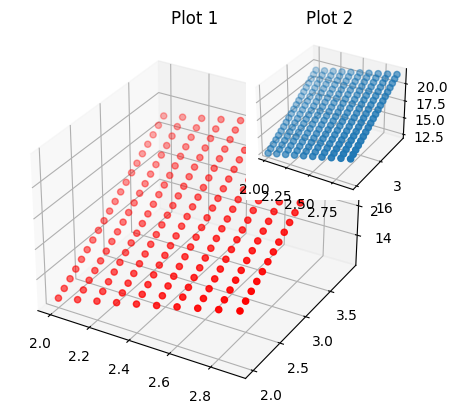

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(alist, blist, result, color = 'red')
ax1.set_title('Plot 1')

ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(alist, blist, arclength)
ax2.set_title('Plot 2')

plt.show()